In [1]:
import pandas as pd
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager
from key import api_key,secret_key

<AxesSubplot:>

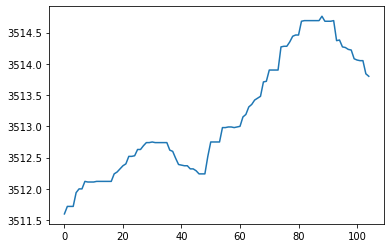

In [11]:
client = Client(api_key,secret_key)
symbol = 'ETHUSDT'
engine = sqlalchemy.create_engine('sqlite:///{}stream.db'.format(symbol))
df = pd.read_sql(symbol,engine)
df.price.plot()

In [ ]:
def strategy(entry,lookback, qty, open_position=False):
    while True:
        # get fresh data
        df = pd.read_sql('BTCUSDT',engine)
        # take all rows of lookback
        loopback_period = df.iloc[-lookback:]
        # get cumulative return
        cum_ret = (loopback_period.price.pct_change()+1).comprod() -1
        if not open_position:
            if cum_ret[cum_ret.last_valid_index()] > entry:
                order = client.create_order(symbol='BTCUSDT',side='BUY',type='MARKET',quantity=qty)
                print(order)
                open_position = True
                break
    if open_position:
        while True:
            # get fresh data
            df = pd.read_sql('BTCUSDT',engine)
            # take all rows since last buy order
            since_buy = df.loc[df.time > pd.to_datetime(order['transactTime'],unit='ms') ]
            if len(sincebuy) > 1:
                since_buy_ret = (since_buy.price.pct_change() +1).cumprod()-1
                last_entry = since_buy_ret[since_buy_ret.last_valid_index()]
                if last_entry > 0.0015 or last_entry < -0.0015:
                    order = client.create_order(symbol='BTCUSDT',side='SELL',type='MARKET',quantity=qty)
                    print(order)
                    break